## Practical 4: SVM (Basics)

The objectives of this practical are:
- To learn intuitively with illustrations the basics of SVM with a focus on linear SVM
- To better understand with illutations the concepts of maximal and soft margin classifiers
- To get hands-on expereince in using the relevant libraries for SVM

## Tutorial: SVM with Illustrations

The code adapted with updates/revisions from In-Depth: Support Vector Machines by Jake VanderPlas:

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [5]:
%matplotlib inline

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats

# use seaborn plotting methods
import seaborn as sns; sns.set()

### Generate a dataset

scikit-learn includes various random sample generators (e.g. make_blobs() used in this tutorial) in the sklearn.datasets class that can be used to generate datasets of controlled size and complexity. These datasets are particularly useful for illustrations.

For further information about the parameters used in the function, refer to:

https://scikit-learn.org/stable/datasets/sample_generators.html

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0]


C:\Users\xLightless\AppData\Local\Temp\ipykernel_36316\4008148549.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=['yellow']*len(y), s=50, cmap='autumn');


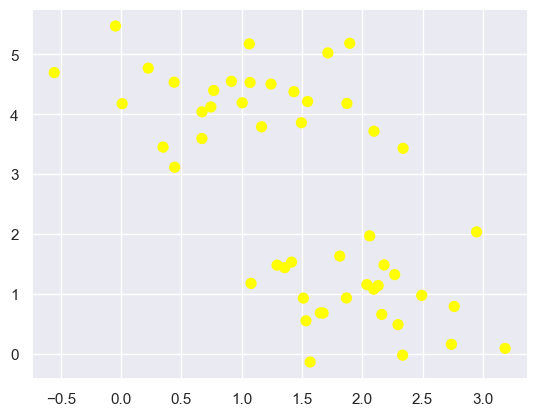

In [29]:
X, y = datasets.make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.6) # random_state=0 produces the same dataset in every run

# marker has a default value of 'o', as many colours as class labels, a size of 50 and a colour map of autumn
print(y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

As we can see the data points are well separated. We can change the value of cluster_std to introduce some noise if needed.

**Change the value of cluster_std to a higher or lower value, e.g. 1.2 or 0.3, which represents a higher or lower standard derivation of the clusters, and see what happens.**

### Which line should be chosen as the decision boundary?

Many lines can be drawn to devide the data into two groups but we need to choose the best as the decision boundary.

Given a new data point (e.g., the one marked by the "X" in this plot), depending on which line is chosen as the decision boundary, it can be assigned a different class! So which line should be chosen as the decision boundary that is the best to class a new data point to the class it's likely to belong to?

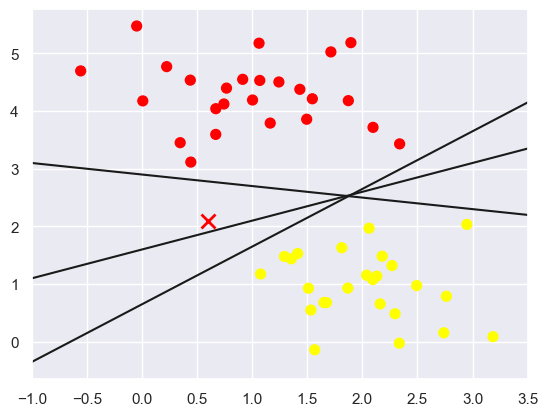

In [7]:
xfit = np.linspace(-1, 3.5) # generate the x axis
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for w1, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, w1 * xfit + b, '-k')


plt.xlim(-1, 3.5);

A number of numpy and matplotlib.pyplot methods are used in the above cell. It would be useful to explore how to use them. For further information, refer to:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

### The line with the widest margin is the best!

The line in the middle has the widest margin and it's least likely to make a wrong classification (i.e. has the largest margin of error). This line is the marximal margin classifier.

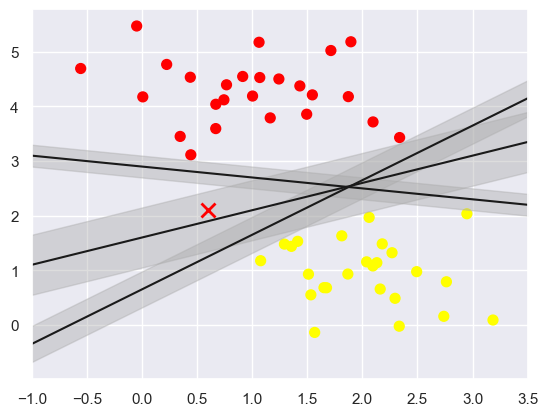

In [8]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for w1, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = w1 * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

## Exercise 1.

- What are the margin, the maximal margin and the maximal margin classifier in an SVM?

### Fit an SVM model with the dataset

We can fit an SVM model, i.e. a kernel, with the dataset to find the maximal margin classifier. Let's use a linear kernel (refer to the lecture notes) and set the C parameter (refer to the lecture notes) to a very large number.

For further information on SVMs supported by sklearn, refer to:

https://scikit-learn.org/stable/modules/svm.html

For further information on the SVC function, refer to:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC


In [9]:
from sklearn.svm import SVC # Support Vector Classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

## Exercise 2.

- What's the linear kernel?

- What is C=1E10 meant to do?

### Visualise the decision bounday of the model

We first define a function for plotting an SVM decision boundary.

*Note that this is a useful function for plotting an SVM decision boundary.*

In [10]:
# Function for plotting an SVM decision bounday

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Call the function to draw the boundary

This is the maximal margin classifier. 

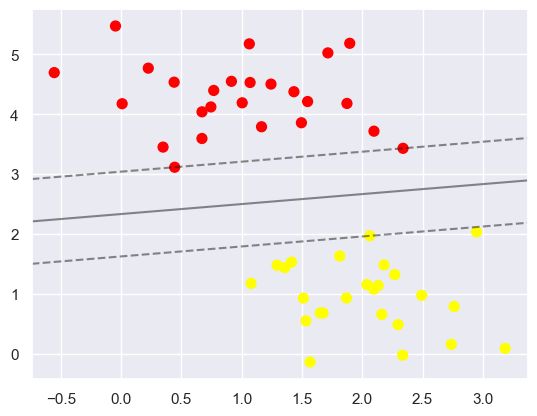

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Note that those data points at the edges of the margin are the support vectors of the model. We can get those support vectors which are in a NumPy array.

### Get to know the attributes of a fitted SVM model

We can get access to various attributes of a fitted model using the appropriate methods. For further information, refer to:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [12]:
# Get the weights of the model

model.coef_

array([[ 0.23525694, -1.41250783]])

These are the values of weights $w_1$ and $w_2$ in the three equations of the decision boundary.

In [13]:
# Get the constant of the decision boundary
model.intercept_

array([3.29634152])

This is the value of bias $b$ in the three equations of the decision boundary.

In [14]:
# Get the support vectors
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

These are the three support vectors that decide on the decison boundary. Can you find them in the illustration?

We can plot two models learned from the first 60 and 120 data points of the dataset.

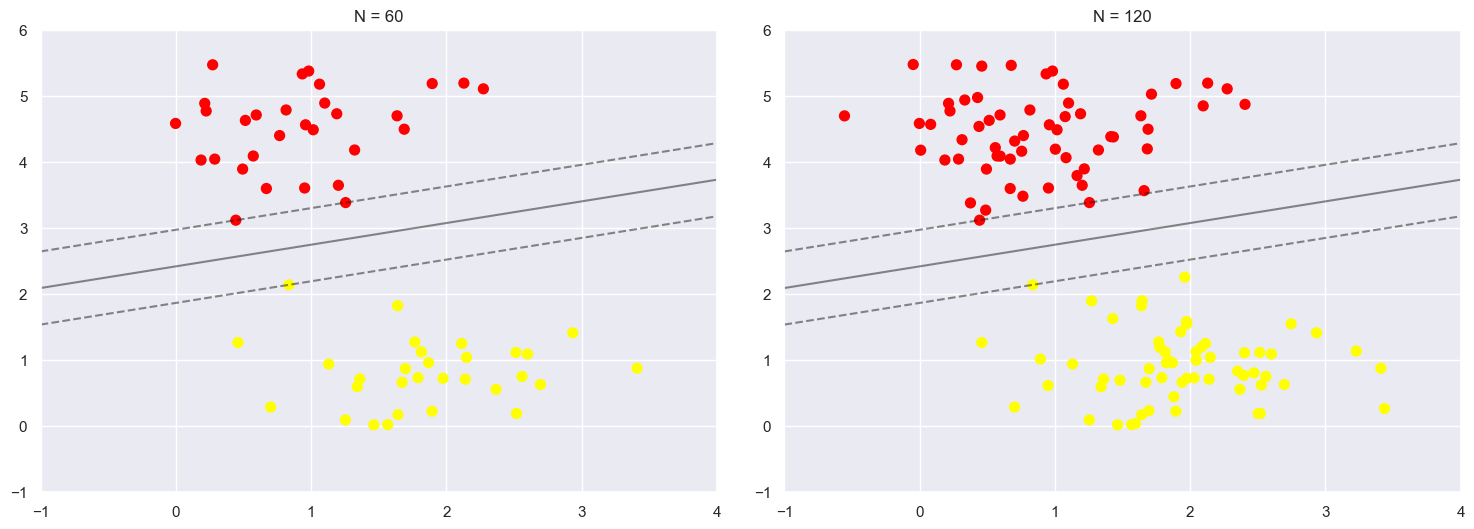

In [15]:
def plot_svm(N=10, ax=None):
    X, y = datasets.make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

We can use IPython's interactive widgets to do this interactively to see how the decision boundary changes with each chosen size for the training dataset.

In [16]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 50, 100, 200], ax=fixed(None));

ModuleNotFoundError: No module named 'ipywidgets'

## Exercise 3.

As shown above, we have now known the weights and bias in the decision boundary, based on which we can calculate and answer the following questions (refer back to the lecture notes if needed):

- What's the decision boundary of the model? 
- How to claculate the intercepts of the decision boundary? 
- What are the intercepts on the vertical and horizontal axes?

### Soft margin classifiers for noise datasets

In [ ]:
X, y = datasets.make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

As we can see, we can change the value of cluster_std to increase the standard derivation of the clusters hence introducing some noise.

When we have a dataset as shown above, in which some data points of the two clusters are overlapping, if we fit the maximal margin classifier on the dataset, we may overfit the model and the decison boundary will be very tweaked with a very narrow margin. When the classifier is used to predict a new data point, it's possible for it to be on the wrong side of the margin hence misclassified.

In this case, to fit a soft margin classifier on the dataset would be better in terms of balancing the classification error and the margin error.

When fitting the model, we can change the $C$ parameter to affect the softness of the margin, the larger $C$ is, the harder the margin is; or the smaller $C$ is the softer the margin is.

The plot below shows how a changing $C$ parameter affects the softness of the margin.

In [ ]:
X, y = datasets.make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

The optimal value of the $C$ parameter will depend on your dataset and application requirements, which can be tuned using cross-validation. In order to tune $C$, a validation dataset is needed, which needs to be different from the testing dataset.

## Exercise 4.

- What are the margin error, the classification error and the soft margin classifier in an SVM?
- How to balance the trade-off between the margin error and the classification error?
- How is the SVM error defined?

## Exercise 5 (optional). 

### Apply the linear kernel to the datasets we have used, e.g. the titanic, SUV purchase, the iris datasets.

You can compare its performace of the linear SVM with the logistic regression model.